In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


In [2]:
df= pd.read_csv(r'Preprocessed_data.csv')
df.head()

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1        1     1        491          0     0   
1         0              2        2     1        146          0     0   
2         0              1        3     2          0          0     0   
3         0              1        4     1        232       8153     0   
4         0              1        4     1        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   

   attack  Last_flag  
0       1         20  
1       1         15  
2       2         19  
3       1         21  
4       1         21  

[5 rows x 43 columns]

In [3]:
df.dtypes

duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
 srv_serror_rate         

Text(0.5, 1.0, 'Correlation Matrix')

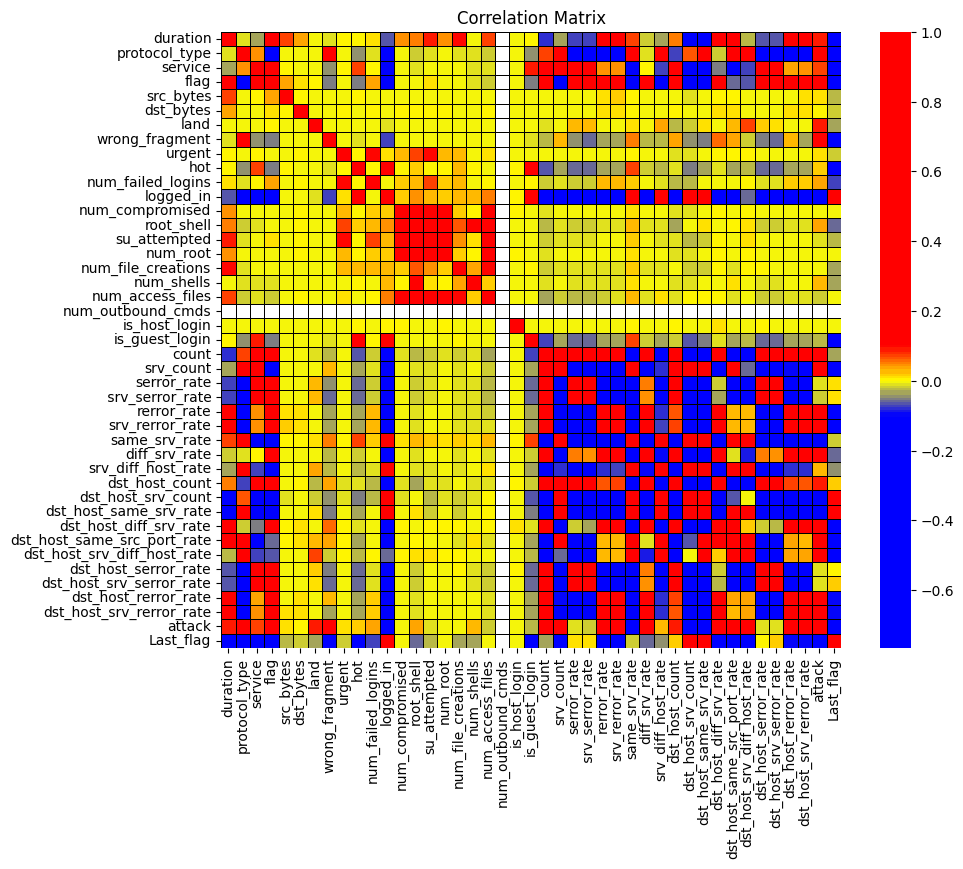

In [4]:
colors = [(0, 'blue'), (0.45, 'blue'), (0.5, 'yellow'), (0.55, 'red'), (1, 'red')]
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Create a heatmap
corr_mat=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=False, cmap=cmap, fmt=".2f", linewidths=.5, linecolor='black', center=0)
plt.title('Correlation Matrix')

In [5]:
x=df.iloc[:,[0,1,2,3,6,7,10,11,13,17,18,21,22,23,26,27,28,29,30,31,32,33,34,35,36,39,40,42]]
y=df.iloc[:,[41]]

Splitting Train and test data

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
print(X_train.shape)
print(y_train.shape)

(94479, 28)
(94479, 1)


KNeighborsClassifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_train,y_train)

C:\Users\sivam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [8]:
Accuracy=model.score(X_test,y_test)
print("Accuracy of the model is:",Accuracy)

Accuracy of the model is: 0.9759636756207531


In [9]:
value=[[500,3,4,1,1,0,2,2,0,0,5,1,28,11,.5,.6,.03,.45,180,15,1,.47,1,1,15,12,.34,23]]
pr=model.predict(value)
print(pr)

[1]


C:\Users\sivam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


naive_bayes

In [10]:
from sklearn.naive_bayes import GaussianNB
gb= GaussianNB()
gb.fit(X_train, y_train)

C:\Users\sivam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [11]:
Accuracy=gb.score(X_test,y_test)
print("Accuracy of the model is:",Accuracy)

Accuracy of the model is: 0.6831777481425033


In [12]:
value=[[500,3,4,1,1,0,2,2,0,0,5,1,28,11,.5,.6,.03,.45,180,15,1,.47,1,1,15,12,.34,23]]
pr=gb.predict(value)
print(pr)

[4]


C:\Users\sivam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

C:\Users\sivam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [14]:
Accuracy=rf.score(X_test,y_test)
print("Accuracy of the model is:",Accuracy)

Accuracy of the model is: 0.9982536356131326


In [15]:
value=[[500,3,4,1,1,0,2,2,0,0,5,1,28,11,.5,.6,.03,.45,180,15,1,.47,1,1,15,12,.34,23]]
pr=gb.predict(value)
print(pr)

[4]


C:\Users\sivam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Bagging Classifier

In [16]:
from sklearn.ensemble import BaggingClassifier
bs=BaggingClassifier()
bs.fit(X_train,y_train)

C:\Users\sivam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier()

In [17]:
Accuracy=bs.score(X_test,y_test)
print("Accuracy of the model is:",Accuracy)

Accuracy of the model is: 0.9973963294595796


In [18]:
value=[[500,3,4,1,1,0,2,2,0,0,5,1,28,11,.5,.6,.03,.45,180,15,1,.47,1,1,15,12,.34,23]]
pr=bs.predict(value)
print(pr)

[1]


C:\Users\sivam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)

C:\Users\sivam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [20]:
Accuracy=KNN.score(X_test,y_test)
print("Accuracy of the model is:",Accuracy)

Accuracy of the model is: 0.9759636756207531


In [21]:
value=[[500,3,4,1,1,0,2,2,0,0,5,1,28,11,.5,.6,.03,.45,180,15,1,.47,1,1,15,12,.34,23]]
pr=KNN.predict(value)
print(pr)

[1]


C:\Users\sivam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
Accuracy=dtc.score(X_test,y_test)
print("Accuracy of the model is:",Accuracy)

Accuracy of the model is: 0.9970153045024449


In [24]:
value=[[500,3,4,1,1,0,2,2,0,0,5,1,28,11,.5,.6,.03,.45,180,15,1,.47,1,1,15,12,.34,23]]
pr=dtc.predict(value)
print(pr)

[1]


C:\Users\sivam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\sivam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sivam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
Accuracy=lr.score(X_test,y_test)
print("Accuracy of the model is:",Accuracy)

Accuracy of the model is: 0.8509557376008129


In [27]:
value=[[500,3,4,1,1,0,2,2,0,0,5,1,28,11,.5,.6,.03,.45,180,15,1,.47,1,1,15,12,.34,23]]
pr=lr.predict(value)
print(pr)

[1]


C:\Users\sivam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


SDGC CLassifier

In [28]:
from sklearn.linear_model import SGDClassifier
SGDC=SGDClassifier()
SGDC.fit(X_train,y_train)


C:\Users\sivam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier()

In [30]:
Accuracy=SGDC.score(X_test,y_test)
print("Accuracy of the model is:",Accuracy)

Accuracy of the model is: 0.888327935479774


In [32]:
value=[[500,3,4,1,1,0,2,2,0,0,5,1,28,11,.5,.6,.03,.45,180,15,1,.47,1,1,15,12,.34,23]]
pr=SGDC.predict(value)
print(pr)

[12]


C:\Users\sivam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
